# **<<< Only Problem 1 and 2 will be graded >>>**

## Problem 1 (sound)
Denoising time with FFT (DFT)

In [2]:
%pip install praat-parselmouth

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

import librosa
import parselmouth

In [4]:
sampling_rate = 32000
N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq

# random period
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts

# fs in sampling rate = 32000
fs_real = fs*sampling_rate

# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

# create clean signal
h = np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

# signal with noise
h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700

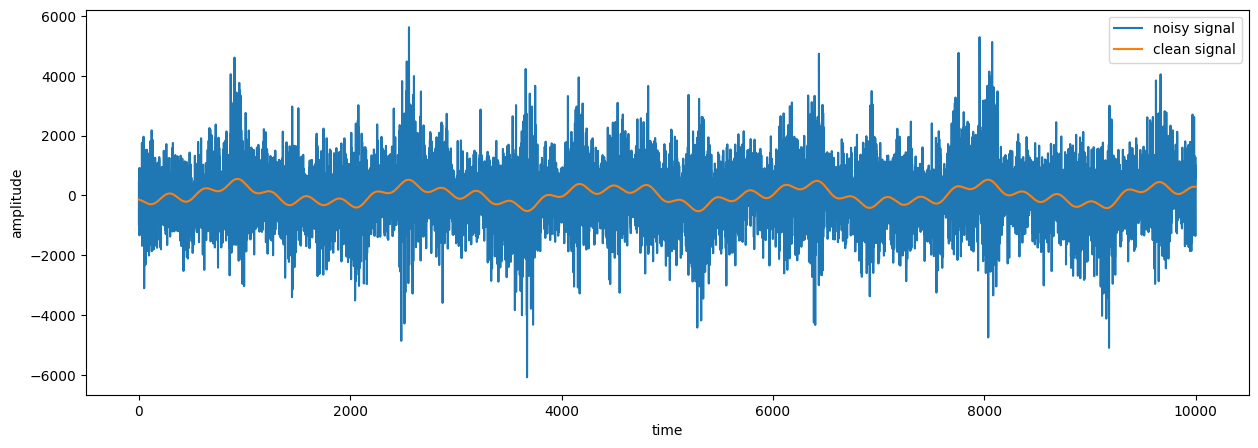

In [5]:
# TODO 1.1 : plot (1) clean signal and (2) noisy signal with label
plt.figure(figsize=(15,5))
plt.plot(t,h_w_noise,label='noisy signal')
plt.plot(t,h,label='clean signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()
plt.show()



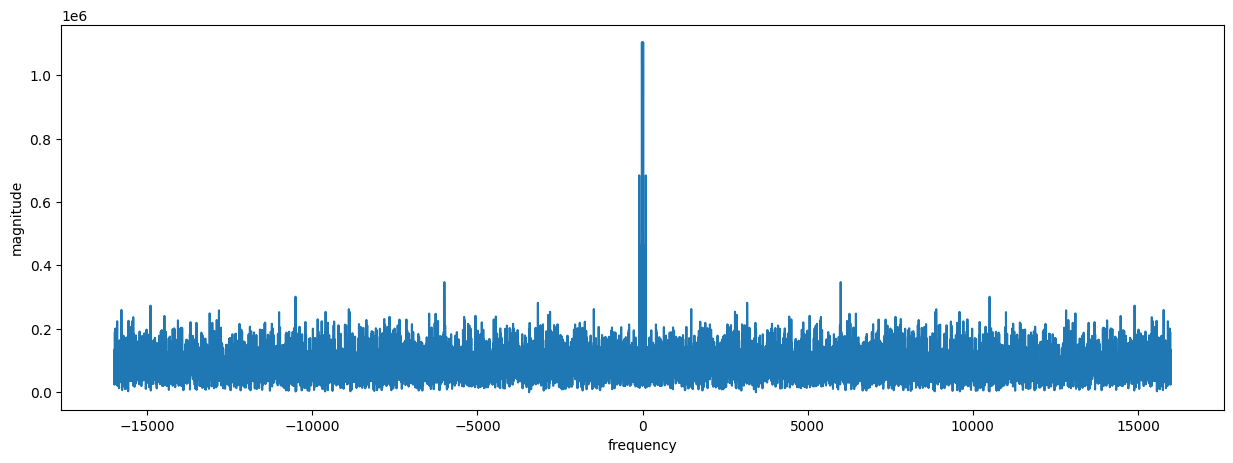

In [11]:
# 1.2: plot magnitude of FFT of the noisy signal (freq sort form min--> max) using np.fft.fft

h_w_noise_fft = np.fft.fft(h_w_noise)
tt = np.fft.fftfreq(N)*sampling_rate
plt.figure(figsize=(15,5))
plt.plot(tt, np.abs(h_w_noise_fft))
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()




c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


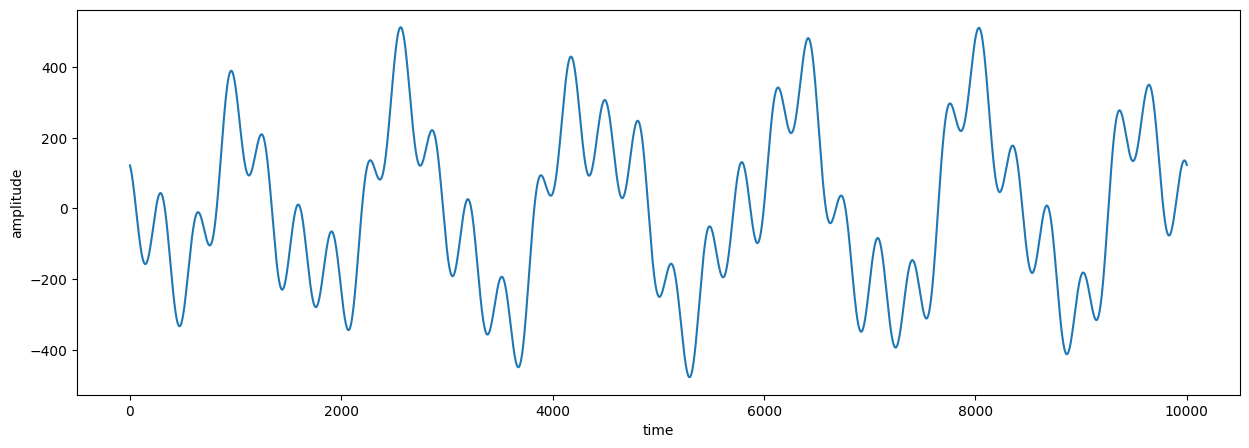

In [8]:
# TODO 1.3 : cleaning the noisy signal using magnitude of FFT

cleand = np.fft.fft(h_w_noise)
cleand[abs(cleand)<400000]=0
plt.figure(figsize=(15,5))
plt.plot(np.fft.ifft(cleand))
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

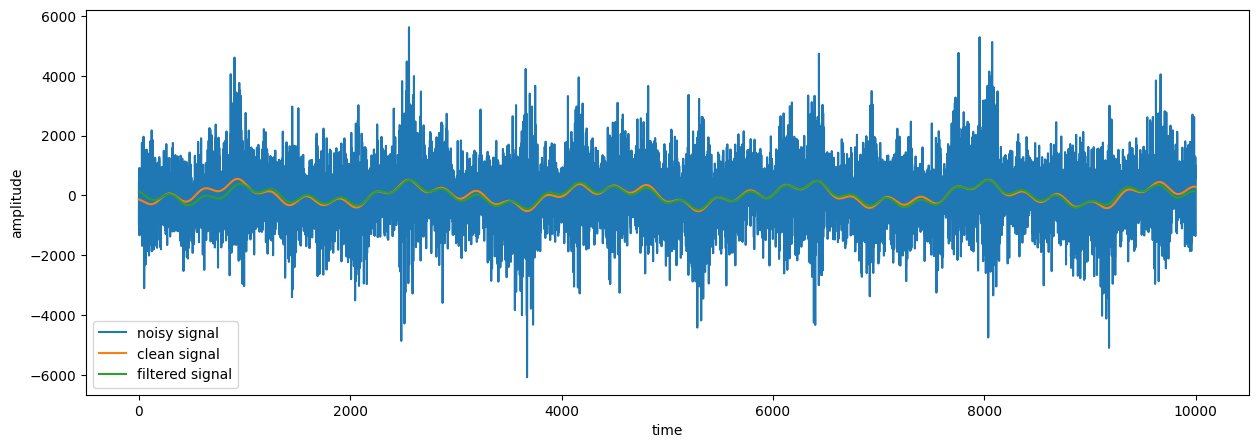

In [9]:
# TODO 1.4 : plot clean signal, noise signal and filtered signal (from your result in TODO 3.3) with label

plt.figure(figsize=(15,5))
plt.plot(t,h_w_noise,label='noisy signal')
plt.plot(t,h,label='clean signal')
plt.plot(np.fft.ifft(cleand),label='filtered signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()
plt.show()



In [ ]:
# TODO 1.5 : export with IPython.display, listen to (1) original signal (2) signal with noise (3) signal after filtered



In [ ]:
# TODO 1.6 : Write to explain and analyze the results



## Problem 2 (image FFT)
Download a 1000 x 1000 image ("hamtaro.png") below

<a href="https://ibb.co/kHTjZbb"><img src="https://i.ibb.co/kHTjZbb/hamtaro.png" alt="hamtaro" border="0"></a>

In [ ]:
screen_shot = cv2.imread('hamtaro.png',0)

plt.figure(figsize=(10,10))
plt.imshow(screen_shot, cmap='gray')
plt.show()

In [ ]:
# Apply FFT to the given image
F1 = fftpack.fft2((screen_shot).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

In [ ]:
# TODO 2.1 : Implement an ideal high-pass filter with a box size of 100x100 pixels on the given image
n = 100



In [ ]:
# TODO 2.2 : Implement an ideal low-pass filter with a box size of 100x100 pixels on the given image



## Problem 3

A digital signal can be generated from sampling of an analog signal using a periodic impulse-train. Explain how you can reconstruct an analog signal from a digital signal and aliasing problem does not occur when $f_s \leq 2f_{max} $ using frequency analysis.

where $f_s$ is the sampling frequency and $f_{max} $ is the maximum frequency of the analog signal

HINT :  $ \mathscr{F} \left\{ \sum_{n=-\infty}^{\infty} \delta (t-n T_s) \right\} = \sum_{n=-\infty}^{\infty} \delta(\omega - n\omega_s)$ if $\omega_s = \frac{2\pi}{T_s} = 2\pi f_s$


## Problem 4 : Aliasing

### Problem 4.1

The following code generates two sine waves (x01_ts01 and x02_ts01) which are sampled in a range of t = 0,0.05 with sampling rate = 5000 Hz (f_samp_01). Study and write a report to analyze the results.

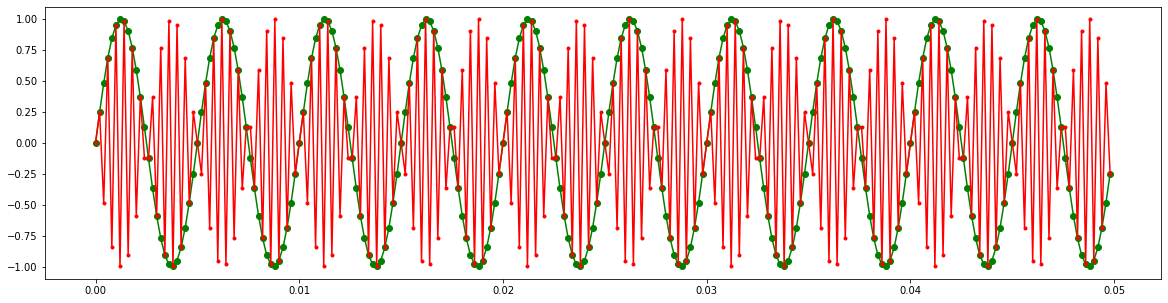

In [ ]:
t_st = 0
t_end = 0.05
f_01 = 200
f_02 = 2300

f_samp_01 = 5000

ts01 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_01), endpoint=False)
x01_ts01 = np.sin(2*np.pi*f_01*ts01)
x02_ts01 = np.sin(2*np.pi*f_02*ts01)

plt.figure(figsize=(20, 5))
plt.plot(ts01, x01_ts01, 'go-', ts01, x02_ts01, 'r.-')
plt.show()

The sampling rate is reduced to 2500 Hz (f_samp_02). Study and write a report to compare the results.



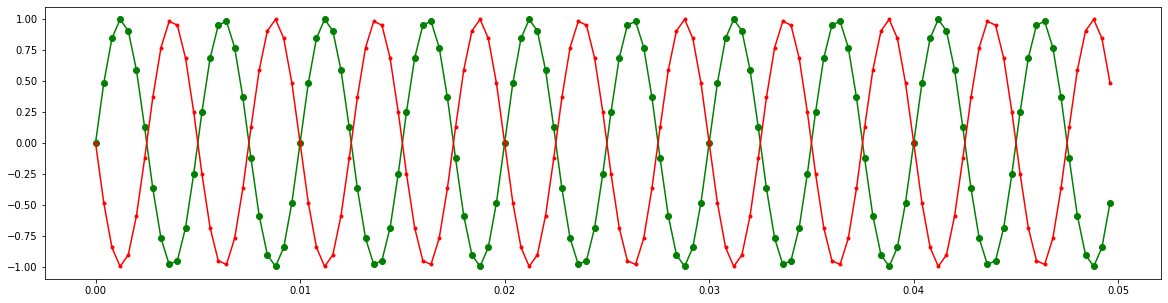

In [ ]:
f_samp_02 = 2500
ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)
x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)

plt.figure(figsize=(20, 5))
plt.plot(ts02, x01_ts02, 'go-', ts02, x02_ts02, 'r.-')
plt.show()

Ans.

### Problem 4.2
The following code generate audio signals at different frequencies. Play the sound and write a report the analyse the results.

In [ ]:
t_st = 0
t_end = 5
f_01 = 50
f_02 = 22050 - f_01
f_03 = 22050 + f_01
f_samp_02 = 22050

ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)

# CREATE SIGNAL WITH DIFFERENT FREQ

x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)
x03_ts02 = np.sin(2*np.pi*f_03*ts02)

In [ ]:
x02_ts02

In [ ]:
ipd.Audio(x01_ts02, rate=f_samp_02)

In [ ]:
ipd.Audio(x02_ts02, rate=f_samp_02)

In [ ]:
ipd.Audio(x03_ts02, rate=f_samp_02)



<a href="https://imgflip.com/i/4djx2z"><img src="https://i.imgflip.com/4djx2z.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator">from Imgflip Meme Generator</a></div>

###  TODO : write report
Ans:

### Problem 4.3
### why many of audio file use sampling rate 44.1 kHz


Ans:

### Problem 5
Download the 3 audio files and analyze all 3 signals with preliminary analysis.
(HINT : Use a log scale for both frequency and magnitude.)"

1. bass-guitar-single-note --> mixkit-bass-guitar-single-note-2331.wav

explain pattern of signal

In [ ]:
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-adult-sneeze-2212.wav
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-child-deep-breath-2237.wav
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-bass-guitar-single-note-2331.wav